In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler   
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score


In [2]:
df = pd.read_csv("MatchingGamers_Finale.csv")  #loading the dataframe

In [3]:
df.head(5)

,Unnamed: 0,Your Age,Your Location,Languages you prefer to speak,Platform to communicate,Top 3 Games (1/3),Top 3 Games (2/3),Top 3 Games (3/3),How long do you play,Your Gaming Performance,Hobbies (1/3),Hobbies (2/3),Hobbies (3/3)
0,0,23,Mannheim,German,Discord,Grand Theft Auto (GTA) Online,Call of Duty (COD),Fortnite,Less than 10 hours,6,Travelling,Foodie,Going out with Friends
1,1,24,Stuttgart,German,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,FIFA,10 - 15 hours,5,Going out with Friends,Watching Animes,Sport
2,2,27,Mannheim,English,Discord,Grand Theft Auto (GTA) Online,Fortnite,Other Games,Less than 10 hours,5,Watching Netflix,Foodie,Going out with Friends
3,3,29,Neuhausen,German,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,Other Games,Less than 10 hours,2,Travelling,Foodie,Going out with Friends
4,4,20,Stuttgart,German,PS Party,Grand Theft Auto (GTA) Online,Call of Duty (COD),Rocket league,Less than 10 hours,8,Watching Animes,Sport,Foodie


## Step 1: Deleting the column "Unnamed:0"

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Preprocessing

## Step 2: Analyzing the values

<AxesSubplot:>

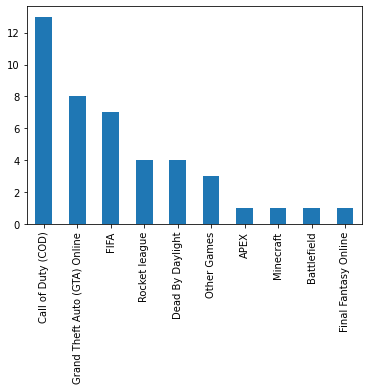

In [9]:
df['Top 3 Games (1/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

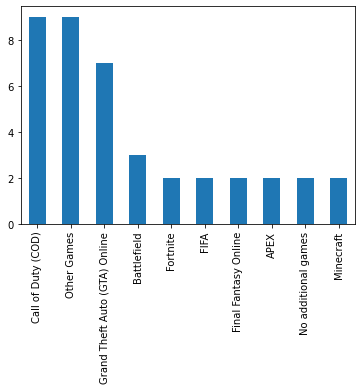

In [10]:
df['Top 3 Games (2/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

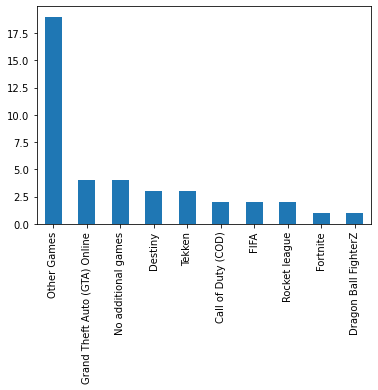

In [11]:
df['Top 3 Games (3/3)'].value_counts().head(10).plot.bar()

To understand the target group better, we are going to anaylze the data. Visualizing the Top 3 Games we can see that:
- Especially Call of Duty (COD) gamers participated
- Also a high amount of Grand Theft Auto (GTA) gamers participated
- The participants tend to play shooter games
- The amount of Minecraft, Dragon Ball FighterZ, Final Fantasy, Tekken, Rocketleague is in comparison to the shooter games really low

<AxesSubplot:>

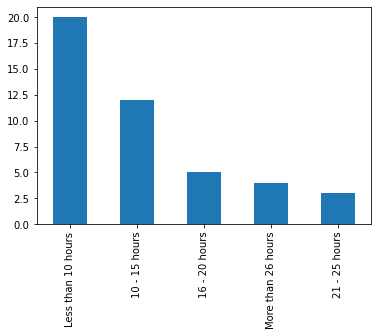

In [12]:
df['How long do you play'].value_counts().head(10).plot.bar()

The gamers tend not to be hardcore gamers based on the amount of playing games. 

<AxesSubplot:>

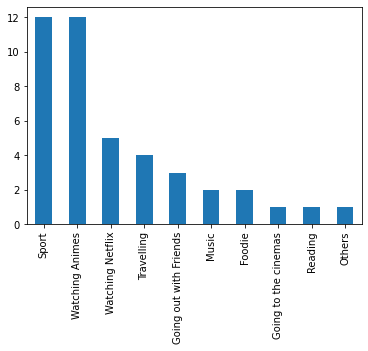

In [14]:
df['Hobbies (1/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

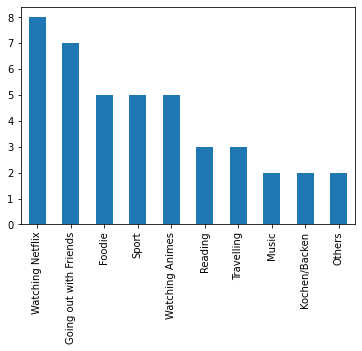

In [15]:
df['Hobbies (2/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

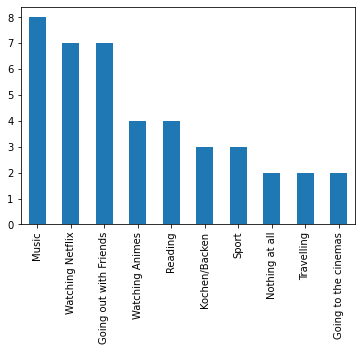

In [16]:
df['Hobbies (3/3)'].value_counts().head(10).plot.bar()

The target group watch animes and Netflix, meet friends, like music and do sports. To cook or to bake, travelling and reading are not good presented. In terms of travelling it can depend on the current situation. 

In [17]:
# check datatypes because we need data with same type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Your Age                       44 non-null     int64 
 1   Your Location                  44 non-null     object
 2   Languages you prefer to speak  44 non-null     object
 3   Platform to communicate        44 non-null     object
 4   Top 3 Games (1/3)              44 non-null     object
 5   Top 3 Games (2/3)              44 non-null     object
 6   Top 3 Games (3/3)              44 non-null     object
 7   How long do you play           44 non-null     object
 8   Your Gaming Performance        44 non-null     int64 
 9   Hobbies (1/3)                  44 non-null     object
 10  Hobbies (2/3)                  44 non-null     object
 11  Hobbies (3/3)                  44 non-null     object
dtypes: int64(2), object(10)
memory usage: 4.2+ KB


For the algorithm K-means clustering we need numerical data. 

In [18]:
# check the mean, minimum and maximum value of numerical features
df.describe()

,Your Age,Your Gaming Performance
count,44.000000,44.000000
mean,26.522727,6.454545
std,4.411869,2.096004
min,18.000000,1.000000
25%,23.000000,5.000000
50%,27.000000,7.000000
75%,29.250000,8.000000
max,35.000000,10.000000


Nevertheless only "Your Age" and "Your Gaming Performance" are numerical.

## Step 3: Converting categorical features into numerical data

To be able to performe the algorithm, the categorical features will be converted into numerical data

In [19]:
# convert categorical features to numeric data
categorical_features = ['Your Location','Languages you prefer to speak','Platform to communicate','Top 3 Games (1/3)','Top 3 Games (2/3)','Top 3 Games (3/3)','How long do you play', 'Hobbies (1/3)', 'Hobbies (2/3)', 'Hobbies (3/3)']

In [20]:
# We use get_dummies function from pandas that Convert categorical variable into dummy/indicator variables.
def convert_to_int_data(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

In [21]:
# We run the function to get data in numeric format
df = convert_to_int_data(df,categorical_features)
df.head()

,Your Age,Your Gaming Performance,Your Location_Backnang,Your Location_Bad Schwartau,Your Location_Bad Zwischenahn,Your Location_Bernau,Your Location_Deutschland,Your Location_Deutschland,Your Location_Durchhausen (bei Villingen-Schwenningen),Your Location_Essen,...,Hobbies (3/3)_Going to the cinemas,Hobbies (3/3)_Kochen/Backen,Hobbies (3/3)_Music,Hobbies (3/3)_Nothing at all,Hobbies (3/3)_Others,Hobbies (3/3)_Reading,Hobbies (3/3)_Sport,Hobbies (3/3)_Travelling,Hobbies (3/3)_Watching Animes,Hobbies (3/3)_Watching Netflix
0,23,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Normalize the data
def normalization(input_data):
    minimum = np.amin(input_data, axis=0)
    maximum = np.amax(input_data, axis=0)
    normalized_data = (input_data - minimum)/(maximum - minimum)
    return normalized_data
df = normalization(df)

In [23]:
df.head()

,Your Age,Your Gaming Performance,Your Location_Backnang,Your Location_Bad Schwartau,Your Location_Bad Zwischenahn,Your Location_Bernau,Your Location_Deutschland,Your Location_Deutschland,Your Location_Durchhausen (bei Villingen-Schwenningen),Your Location_Essen,...,Hobbies (3/3)_Going to the cinemas,Hobbies (3/3)_Kochen/Backen,Hobbies (3/3)_Music,Hobbies (3/3)_Nothing at all,Hobbies (3/3)_Others,Hobbies (3/3)_Reading,Hobbies (3/3)_Sport,Hobbies (3/3)_Travelling,Hobbies (3/3)_Watching Animes,Hobbies (3/3)_Watching Netflix
0,0.294118,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.352941,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.529412,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.647059,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.117647,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4: Apply elbow method to find the optimal clusters

In [24]:
# converting string column to numaric
from sklearn.preprocessing import LabelEncoder

In [25]:
# label encoding
labelEnc = LabelEncoder()
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i] = labelEnc.fit_transform(df[i])

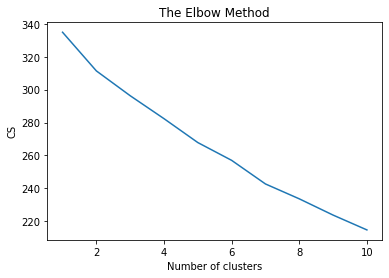

In [26]:
# Use elbow method to find optimal number of clusters 
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

The method has not really a significant bend as expected. Therefore the amount of optimal clusters cannot be defined easily. For 2 clusters there is a "small" bend thats why we assume that the amount of optimal clusters are 2.

## Step 5: Apply PCA before applying K-Means

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(2)

In [29]:
df = pca.fit_transform(df)

In [30]:
df.shape

(44, 2)

## Step 6: Applying K-Means

In [31]:
#Import required module
from sklearn.cluster import KMeans

In [32]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)

In [33]:
#predict the labels of clusters.
label = kmeans.fit_predict(df)

In [34]:
label

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

## Step 7: Plot the data and the clusters

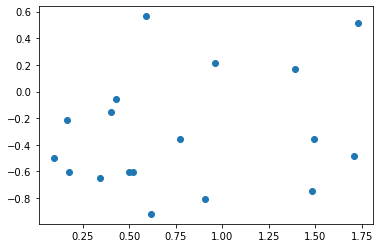

In [35]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

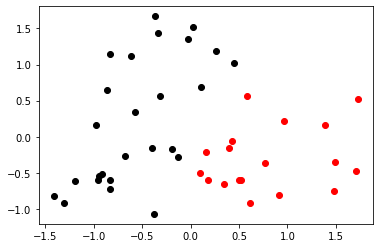

In [36]:
#filter rows of original data
filtered_label2 = df[label == 0]
 
filtered_label8 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

The result of this method is not satisfying. Therefore, we will run the same code again but use features which are "gaming related". This is kinda the same approach as Manero et al. (2016) had.

### Loading the dataframe again

In [37]:
df = pd.read_csv("MatchingGamers_Finale.csv") #loading the dataframe

In [38]:
df.drop('Unnamed: 0', axis=1, inplace=True) #dropping "Unnamed: 0" Column

## Applying Step 3 - Step 7 again

In [39]:
# Select the categorical features which are related to the gaming preferences
df1 = df[['Platform to communicate','Top 3 Games (1/3)', 'Top 3 Games (2/3)', 'Top 3 Games (3/3)', 'How long do you play', 'Your Gaming Performance' ]]

In [40]:
# convert features to numeric
categorical_features = ['Platform to communicate','Top 3 Games (1/3)','Top 3 Games (2/3)','Top 3 Games (3/3)','How long do you play']

In [41]:
# We use get_dummies function from pandas that Convert categorical variable into dummy/indicator variables.
def convert_to_int_data(data,columns):
  dummies = pd.get_dummies(data[columns])
  data = data.drop(columns, axis=1)
  data = pd.concat([data, dummies], axis=1)
  return data

In [42]:
# We run the function to get data in numeric format
df1 = convert_to_int_data(df1,categorical_features)
df1.head()

,Your Gaming Performance,Platform to communicate_Discord,Platform to communicate_Other Platforms,Platform to communicate_PS Party,Top 3 Games (1/3)_APEX,Top 3 Games (1/3)_Battlefield,Top 3 Games (1/3)_Call of Duty (COD),Top 3 Games (1/3)_Dead By Daylight,Top 3 Games (1/3)_FIFA,Top 3 Games (1/3)_Final Fantasy Online,...,Top 3 Games (3/3)_NBA,Top 3 Games (3/3)_No additional games,Top 3 Games (3/3)_Other Games,Top 3 Games (3/3)_Rocket league,Top 3 Games (3/3)_Tekken,How long do you play_10 - 15 hours,How long do you play_16 - 20 hours,How long do you play_21 - 25 hours,How long do you play_Less than 10 hours,How long do you play_More than 26 hours
0,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,8,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
#Normalize the data
def normalization(input_data):
    minimum = np.amin(input_data, axis=0)
    maximum = np.amax(input_data, axis=0)
    normalized_data = (input_data - minimum)/(maximum - minimum)
    return normalized_data
df1 = normalization(df1)

In [44]:
df1.head()

,Your Gaming Performance,Platform to communicate_Discord,Platform to communicate_Other Platforms,Platform to communicate_PS Party,Top 3 Games (1/3)_APEX,Top 3 Games (1/3)_Battlefield,Top 3 Games (1/3)_Call of Duty (COD),Top 3 Games (1/3)_Dead By Daylight,Top 3 Games (1/3)_FIFA,Top 3 Games (1/3)_Final Fantasy Online,...,Top 3 Games (3/3)_NBA,Top 3 Games (3/3)_No additional games,Top 3 Games (3/3)_Other Games,Top 3 Games (3/3)_Rocket league,Top 3 Games (3/3)_Tekken,How long do you play_10 - 15 hours,How long do you play_16 - 20 hours,How long do you play_21 - 25 hours,How long do you play_Less than 10 hours,How long do you play_More than 26 hours
0,0.555556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.444444,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.444444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.111111,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.777778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Elbow method

In [45]:
# converting string column to numaric
from sklearn.preprocessing import LabelEncoder

In [46]:
# label encoding
labelEnc = LabelEncoder()
for i in list(df1.columns):
    if df1[i].dtype == 'object':
        df1[i] = labelEnc.fit_transform(df1[i])

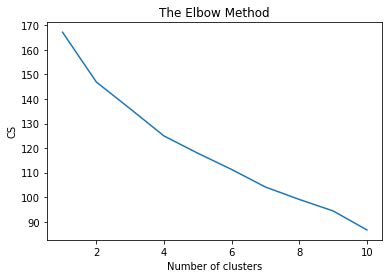

In [47]:
# Use elbow method to find optimal number of clusters 
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

The bend for the elbow method is not significant but its better than for the approach we had before. In this case we can see that there is a small bend for 2 clusters - so we will continue with 2 clusters

### **Apply PCA**

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(2)

In [50]:
df1 = pca.fit_transform(df1)

In [51]:
df1.shape

(44, 2)

### Apply K-Means

In [52]:
#Import required module
from sklearn.cluster import KMeans

In [53]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)

In [54]:
#predict the labels of clusters.
label = kmeans.fit_predict(df1)

In [55]:
label

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

### Plotting the data and the clusters

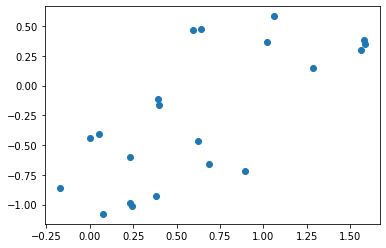

In [56]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df1[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

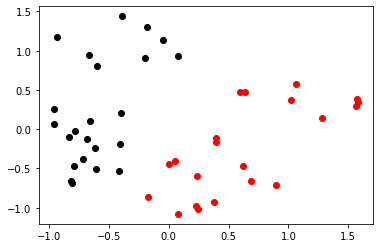

In [57]:
#filter rows of original data
filtered_label2 = df1[label == 0]
 
filtered_label8 = df1[label == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

## Conclusion:

To cluster gamers (based on the criteria that we have) is the K-means clustering method not the optimal way. In terms of matching gamers, we will therefore continue with KNN. 

Reference:

Manero, B., Torrente, J., Freire, M., & Fernández-Manjón, B. (2016). An instrument to build a gamer clustering framework according to gaming preferences and habits. Computers in Human Behavior, 62, 353-363.
